<a href="https://colab.research.google.com/github/MINDS-group/TWIMO/blob/main/Gaussian_NaiveBayes_ClassifierVer1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
from matplotlib import pyplot
from google.colab import drive
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard, LearningRateScheduler
#from tensorflow.keras.optimizers import SGD
from pandas.core.common import standardize_mapping
drive.mount('/content/gdrive') #Matteo
#drive.mount('/content/drive')
#path = '/content/gdrive/MyDrive/AVL-RDE' #Matteo
#path = '/content/drive/MyDrive/AVL-RDE'
import hashlib
from datetime import datetime
import os
import gc


Mounted at /content/gdrive


In [ ]:
#IMPORTANT NOTE: In this body of code, each csv file is considered a seperate dataset
speedRange=10
label=7
features=7
path = '/content/gdrive/MyDrive/AVL-RDE-WithoutTD'
all_csv_files = glob.glob(path + "/*.csv")
all_csv_files_Replica=all_csv_files.copy()
for it in range(len(all_csv_files)):
 #individual_csv_file = all_csv_files_Replica.pop(it)
 individual_csv_file = all_csv_files[it]
 print(individual_csv_file)
 individual_csv_file_data= np.array(pd.read_csv(individual_csv_file)).astype(np.float64)
 velocity = individual_csv_file_data[:,label]
 velocity = np.floor_divide(velocity,speedRange)
 individual_csv_file_data[:,7] = velocity
 X= individual_csv_file_data[:,0:features]
 y=individual_csv_file_data[:,label]
 scalar = StandardScaler()
 X_Scaled = scalar.fit_transform(X)
 X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, shuffle=True, train_size=0.90)
 RF_Classifier = RandomForestClassifier()
 RF_Classifier.fit(X_train, y_train)
 y_prediction = RF_Classifier.predict(X_test)
 print (precision_recall_fscore_support(y_test, y_prediction, average='weighted', zero_division=0))
 print(classification_report(y_test, y_prediction, zero_division=0))
 print (confusion_matrix(y_test, y_prediction))

 print('Next Rount to Fetch new CSV File')

/content/gdrive/MyDrive/AVL-RDE-WithoutTD/19_Highway_DGPS_dyn_22082017_city_part.csv
(0.8693673243699436, 0.8674698795180723, 0.8649883220826571, None)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.80      0.80      0.80         5
         2.0       0.80      0.57      0.67         7
         3.0       0.78      1.00      0.88         7
         4.0       0.91      0.88      0.89        24
         5.0       0.80      1.00      0.89         4
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4
         8.0       1.00      1.00      1.00         3
         9.0       0.50      0.50      0.50         4
        10.0       0.67      0.67      0.67         6

    accuracy                           0.87        83
   macro avg       0.84      0.86      0.84        83
weighted avg       0.87      0.87      0.86        83

[[18  0  0  0  0  0  0  0  0  0  0]

In [ ]:
#IMPORTANT NOTE: In this body of code, each set of related csv files (Highway csv files) is considered a seperate dataset
speedRange=10
label=7
features=7
path = '/content/gdrive/MyDrive/AVL-RDE-WithoutTD'
all_csv_files_ = glob.glob(path + "/*.csv")
#all_csv_files_Replica=all_csv_files.copy()
def get_csv_files_with_string(strName):
    final_list=[]
    #print(path)
    for csv_file in all_csv_files_:
      if strName in csv_file:
        final_list.append(csv_file)
    return final_list
csv_files_with_strings=['Highway','GRZ','Mountain','RDE_18082017','Darmstadt','Baldy']
for name in csv_files_with_strings:
  print(name)
  all_csv_files=[]
  all_csv_files = get_csv_files_with_string(name)
  print(all_csv_files)
  #for it in range(len(all_csv_files)):
  csv_file_data = np.array(pd.concat([pd.read_csv(f) for f in all_csv_files])).astype(np.float64)
  velocity = csv_file_data[:,label]
  velocity = np.floor_divide(velocity,speedRange)
  csv_file_data[:,7] = velocity
  X= csv_file_data[::5,0:features]
  y=csv_file_data[::5,label]
  scalar = StandardScaler()
  X_Scaled = scalar.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, shuffle=True, train_size=0.90)
  #RF_Classifier = RandomForestClassifier()
  #RF_Classifier.fit(X_train, y_train)
  #y_prediction = RF_Classifier.predict(X_test)
  DT_Classifier = DecisionTreeClassifier(random_state=0)
  DT_Classifier.fit(X_train, y_train)
  y_prediction = DT_Classifier.predict(X_test)
  print (precision_recall_fscore_support(y_test, y_prediction, average='weighted', zero_division=0))
  print(classification_report(y_test, y_prediction, zero_division=0))
  print (confusion_matrix(y_test, y_prediction))
  print('Next Rount to Fetch Related Group of CSV Files')

Highway
['/content/gdrive/MyDrive/AVL-RDE-WithoutTD/19_Highway_DGPS_dyn_22082017_city_part.csv', '/content/gdrive/MyDrive/AVL-RDE-WithoutTD/22_Highway_DGPS_dyn_22082017_good_.csv', '/content/gdrive/MyDrive/AVL-RDE-WithoutTD/31_Highway_DGPS_mod_22082017_bad_plabutsch.csv', '/content/gdrive/MyDrive/AVL-RDE-WithoutTD/25_Highway_DGPS_dyn_22082017_ideal_part1.csv', '/content/gdrive/MyDrive/AVL-RDE-WithoutTD/28_Highway_DGPS_dyn_22082017_ideal_part2.csv']
(0.7008963585434174, 0.6941176470588235, 0.6837121957326561, None)
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.00      0.00      0.00         1
         2.0       0.50      1.00      0.67         1
         3.0       1.00      1.00      1.00         3
         4.0       0.86      1.00      0.92         6
         7.0       1.00      1.00      1.00         1
         8.0       1.00      1.00      1.00         4
         9.0       0.90      0.75      0.82    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

['fit_time', 'score_time', 'test_accuracy', 'test_f1_weighted', 'test_precision_weighted', 'test_recall_weighted']
0.19 accuracy with a standard deviation of 0.03
0.19 precision with a standard deviation of 0.02
0.19 recall with a standard deviation of 0.03
0.10 f1_weighted with a standard deviation of 0.03
(0.18494355659449938, 0.19960326770897766, 0.0968437700610816, None)
              precision    recall  f1-score   support

         1.0       0.30      0.95      0.45      8327
         2.0       0.80      0.00      0.00      2480
         3.0       0.00      0.00      0.00      4568
         4.0       0.00      0.00      0.00      5960
         5.0       0.41      0.00      0.00      7134
         6.0       0.00      0.00      0.00      5191
         7.0       0.07      0.01      0.01      3841
         8.0       0.10      0.25      0.14      3055
         9.0       0.11      0.01      0.02      2262
        10.0       0.05      0.17      0.08      1505
        11.0       0.26    

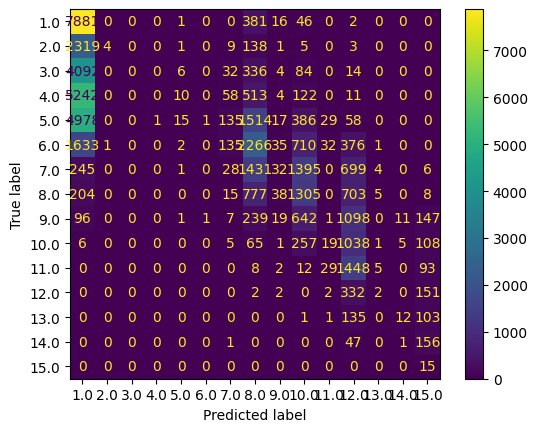

In [ ]:
#IMPORTANT NOTE: In this body of code, all csv files are combined to produce signle huge dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
speedRange=10
label=7
features=7
path = '/content/gdrive/MyDrive/AVL-RDE-WithoutTD'
all_csv_files = glob.glob(path + "/*.csv")
csv_files_data = np.array(pd.concat([pd.read_csv(f) for f in all_csv_files])).astype(np.float64)
velocity = csv_files_data[:,label]
velocity = 1+np.floor_divide(velocity,speedRange)
csv_files_data[:,7] = velocity
X= csv_files_data[:,0:features]
y=csv_files_data[:,label]
scalar = StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, shuffle=True, train_size=0.90)
#RF_Classifier = RandomForestClassifier()
#RF_Classifier.fit(X_train, y_train)
#y_prediction = RF_Classifier.predict(X_test)
gnb_Classifier = GaussianNB()

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
scores = cross_validate(gnb_Classifier, X_train, y_train, cv=5, scoring=scoring)
print (sorted(scores.keys()))
#print (scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("%0.2f precision with a standard deviation of %0.2f" % (scores['test_precision_weighted'].mean(), scores['test_precision_weighted'].std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores['test_recall_weighted'].mean(), scores['test_recall_weighted'].std()))
print("%0.2f f1_weighted with a standard deviation of %0.2f" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))

gnb_Classifier.fit(X_train, y_train)
y_prediction = gnb_Classifier.predict(X_test)
print (precision_recall_fscore_support(y_test, y_prediction, average='weighted', zero_division=0))
print(classification_report(y_test, y_prediction, zero_division=0))
#print (confusion_matrix(y_test, y_prediction))
cm=confusion_matrix(y_test, y_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb_Classifier.classes_)
disp.plot()
plt.show()

